In [26]:
!pip install imblearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 KB 68.9 kB/s eta 0:00:001m135.9 kB/s eta 0:00:01


In [27]:
#all the imports and the dependencies required for the noteboo

import warnings
warnings.filterwarnings("ignore")
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (22,5)

from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, precision_score
from datetime import date

In [36]:
df = pd.read_csv("/home/ariyaman/learntocode/Stockipy/data/historical_stock_data_AXIS.csv")

In [37]:
df


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-27,EQ,1310.00,1310.00,1280.00,1285.40,1288.05,1288.95,1293.09,1310.00,927.15,22311393,2.885058e+10,295852,AXISBANK
1,2024-06-26,EQ,1281.10,1292.95,1259.20,1271.45,1284.00,1285.40,1277.28,1292.95,927.15,13956370,1.782626e+10,252419,AXISBANK
2,2024-06-25,EQ,1234.45,1278.75,1226.00,1228.10,1272.65,1271.45,1259.63,1278.75,927.15,17607952,2.217949e+10,328365,AXISBANK
3,2024-06-24,EQ,1231.00,1235.75,1225.05,1237.45,1229.65,1228.10,1229.00,1246.00,927.15,6676530,8.205424e+09,199186,AXISBANK
4,2024-06-21,EQ,1246.00,1246.00,1223.75,1239.50,1232.10,1237.45,1229.24,1246.00,927.15,29311314,3.603051e+10,236969,AXISBANK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,2013-01-07,EQ,1385.00,1387.70,1365.50,1378.95,1366.00,1372.85,1374.90,1396.50,835.10,1143170,1.571740e+09,36901,AXISBANK
2851,2013-01-04,EQ,1382.45,1386.95,1370.00,1389.95,1377.25,1378.95,1378.26,1396.50,784.00,1252580,1.726378e+09,30409,AXISBANK
2852,2013-01-03,EQ,1394.00,1396.50,1383.25,1386.85,1390.00,1389.95,1390.26,1396.50,784.00,950039,1.320797e+09,36368,AXISBANK
2853,2013-01-02,EQ,1371.15,1394.40,1366.65,1362.70,1386.75,1386.85,1385.25,1394.40,784.00,1433645,1.985963e+09,65271,AXISBANK


In [38]:
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')

The data has 2855 rows and 15 columns


In [33]:
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
colors = plt.rcParams["axes.prop_cycle"]()

fig = plt.figure(figsize=(18,8))

for i in range(len(df.groupby(df.index.day_name(), sort=False).mean().columns[:-2])):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    plt.plot(df.groupby(df.index.day_name(), sort=False).mean().iloc[:, i], color= color, marker='o')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(rotation=0)
    plt.title(f"Google Day-Wise Average {df.groupby(df.index.day_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
    plt.xlabel('Days')
    plt.ylabel(df.groupby(df.index.day_name(), sort=False).mean().iloc[:, i].name)
    plt.legend([data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name])
    c = c + 1

plt.tight_layout()
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'month_name'

<Figure size 1800x1200 with 0 Axes>

In [23]:
#Distribution of the dataset
df_close.plot(kind='kde')

NameError: name 'df_close' is not defined

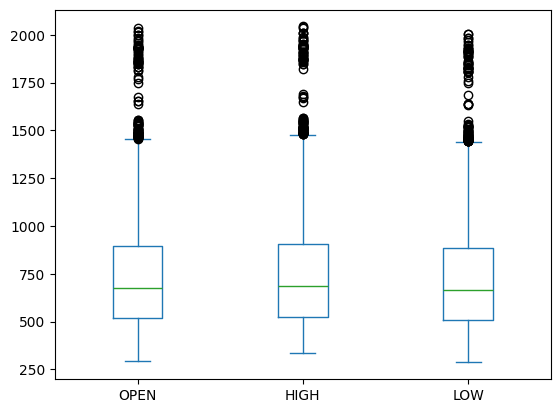

In [7]:
df.iloc[:,1:5].plot(kind="box");plt.show()

In [8]:
df_log = np.log(df['CLOSE'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()

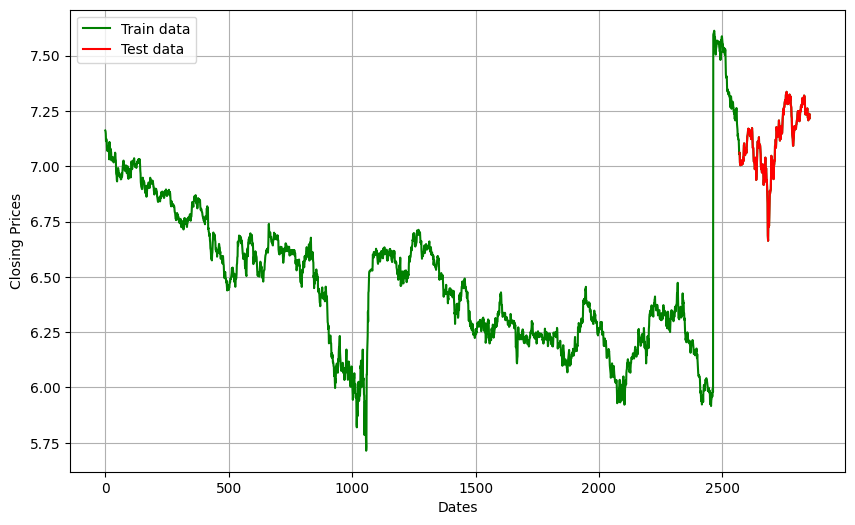

In [9]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()

In [10]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [11]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9449.610, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9447.610, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9447.610, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9451.609, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9445.600, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.002 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2566
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4726.804
Date:                Sat, 29 Jun 2024   AIC                          -9451.609
Time:                        23:07:07   BIC                          -9445.759
Sample:                             0   HQIC                         -9449.488
                               - 2566                                  

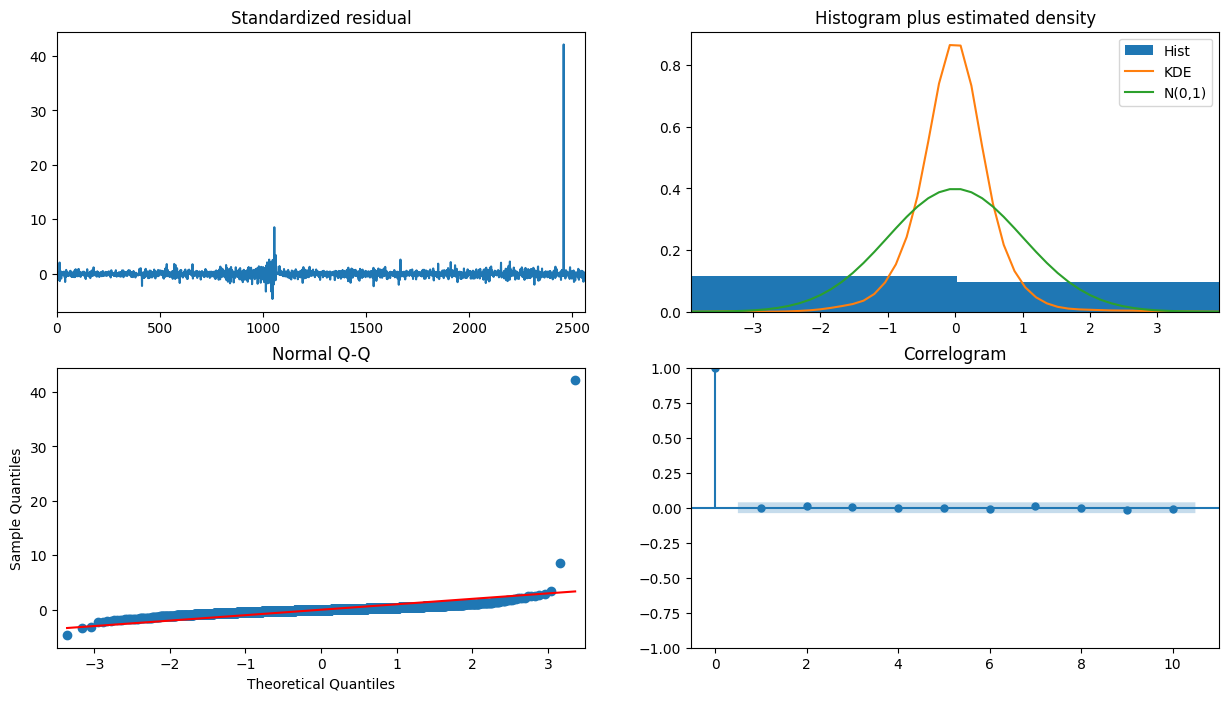

In [12]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [13]:
model = ARIMA(train_data, order=(3, 1, 2))
fitted = model.fit(disp=-1)
print(fitted.summary())

NameError: name 'ARIMA' is not defined